## Module 読み込み

In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
plt.style.use('ggplot')
import numpy as np
import gc
import datetime


## データ読み込み

In [2]:
# Data 読み込みおよび確認
train = pd.read_csv('../data/train.csv', engine='python', parse_dates=['first_active_month'])
test = pd.read_csv('../data/test.csv', engine='python', parse_dates=['first_active_month'])
display(train.head(), test.head())


,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04-01,C_ID_0ab67a22ab,3,3,1
1,2017-01-01,C_ID_130fd0cbdd,2,3,0
2,2017-08-01,C_ID_b709037bc5,5,1,1
3,2017-12-01,C_ID_d27d835a9f,2,1,0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null datetime64[ns]
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 9.2+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
first_active_month    123622 non-null datetime64[ns]
card_id               123623 non-null object
feature_1             123623 non-null int64
feature_2             123623 non-null int64
feature_3             123623 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.7+ MB


In [5]:
train.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


In [6]:
test.describe()

,feature_1,feature_2,feature_3
count,123623.00000,123623.000000,123623.000000
mean,3.10926,1.741796,0.564377
std,1.18911,0.749195,0.495840
min,1.00000,1.000000,0.000000
25%,2.00000,1.000000,0.000000
50%,3.00000,2.000000,1.000000
75%,4.00000,2.000000,1.000000
max,5.00000,3.000000,1.000000


In [7]:
# NA確認
display(train[train.isnull().any(1)], test[test.isnull().any(1)])

,first_active_month,card_id,feature_1,feature_2,feature_3,target


,first_active_month,card_id,feature_1,feature_2,feature_3
11578,NaT,C_ID_c27b4f80f7,5,2,1


In [8]:
# NA 置換
test.loc[test['first_active_month'].isnull(), 'first_active_month']  = test.loc[(test['feature_1'] == 5) & (test['feature_2'] == 2) & (test['feature_3'] == 1), 'first_active_month'].min()

## データDiscription

In [9]:
e = pd.read_excel('../data/Data_Dictionary.xlsx', sheet_name='train')
e

,train.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Unique card identifier
3,first_active_month,"'YYYY-MM', month of first purchase"
4,feature_1,Anonymized card categorical feature
5,feature_2,Anonymized card categorical feature
6,feature_3,Anonymized card categorical feature
7,target,Loyalty numerical score calculated 2 months af...


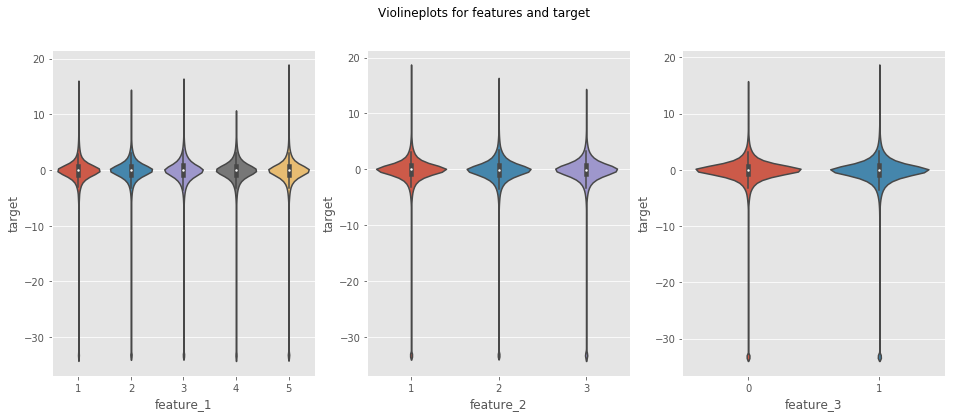

In [10]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6))
plt.suptitle('Violineplots for features and target');
sns.violinplot(x="feature_1", y="target", data=train, ax=ax[0], title='feature_1');
sns.violinplot(x="feature_2", y="target", data=train, ax=ax[1], title='feature_2');
sns.violinplot(x="feature_3", y="target", data=train, ax=ax[2], title='feature_3');

現在の特徴量毎の差はなさそう。

他の特徴量がないと予測が難しい

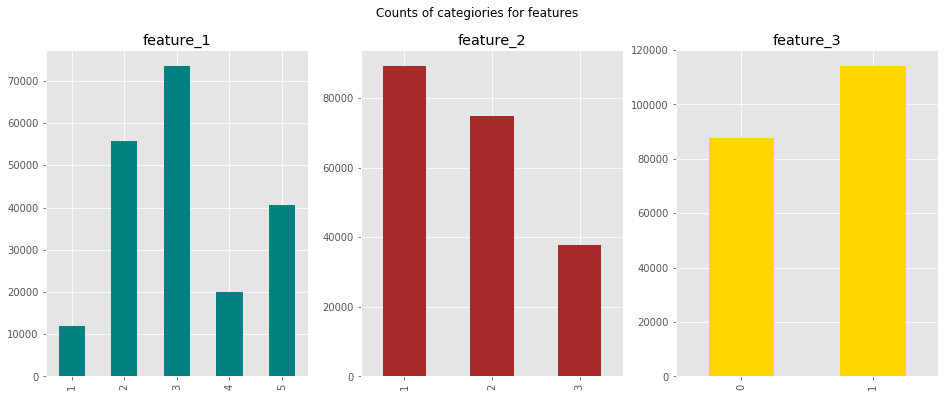

In [11]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6));
train['feature_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='feature_1');
train['feature_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='feature_2');
train['feature_3'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='feature_3');
plt.suptitle('Counts of categiories for features');

それぞれの特徴量のデータの個数はある程度差がある

In [12]:
test['feature_1'] = test['feature_1'].astype('category')
test['feature_2'] = test['feature_2'].astype('category')
test['feature_3'] = test['feature_3'].astype('category')

In [13]:
d1 = train['first_active_month'].value_counts().sort_index()
d2 = test['first_active_month'].value_counts().sort_index()
data = [go.Scatter(x=d1.index, y=d1.values, name='train'), go.Scatter(x=d2.index, y=d2.values, name='test')]

In [14]:
layout = go.Layout(dict(title = "Counts of first active",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Count'),
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

In [15]:
dx = pd.concat([d1,d2],axis=1).fillna(0)

In [16]:
dx.loc[:,'All'] = (dx.iloc[:,0] + dx.iloc[:,1])

In [17]:
data = [go.Scatter(x=dx.index, y=dx.iloc[:,0]/dx.All, name='train')]

In [18]:
layout = go.Layout(dict(title = "Counts of first active",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = '%'),
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

データはだいたい全体の60％がTrain　40％がTestになるように生成されている。月毎もそんなに変わらない

気になるのは２０１７/9月以降減っている点のみ

## Target に付いて確認

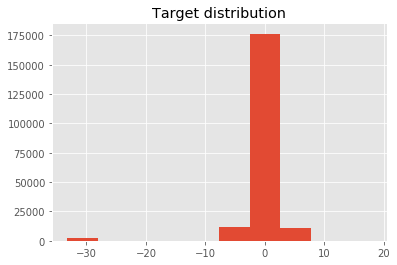

In [19]:
plt.hist(train['target']);
plt.title('Target distribution');

外れ値っぽいデータがあるのでそれの取り扱いについて確認する必要あり

In [20]:
# -20 以下の値を取っているものの数を確認
display(train.loc[train.target < -20].shape[0], len(train), train.loc[train.target < -20].shape[0]/len(train))

2207

201917

0.010930233709890698

全体の１% のデータがおかしい

In [21]:
max_date = train['first_active_month'].dt.date.max()
def process_main(df):
    date_parts = ["year", "weekday", "month"]
    for part in date_parts:
        part_col = 'first_active_month' + "_" + part
        df[part_col] = getattr(df['first_active_month'].dt, part).astype(int)
            
    df['elapsed_time'] = (max_date - df['first_active_month'].dt.date).dt.days
    
    return df

In [22]:
train = process_main(train)
test = process_main(test)

In [23]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,first_active_month_year,first_active_month_weekday,first_active_month_month,elapsed_time
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,2017,3,6,245
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,2017,6,1,396
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,2016,0,8,549
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,2017,4,9,153
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,2017,2,11,92


In [49]:
pd.to_pickle(train, '../data/train.pkl')
pd.to_pickle(test, '../data/test.pkl')

In [52]:

del(train)
del(test)

# historycal_transactions

In [26]:
historical_transactions = pd.read_csv('../data/historical_transactions.csv')
e = pd.read_excel('../data/Data_Dictionary.xlsx',  sheetname='history')
e

,historical_transactions.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Card identifier
3,month_lag,month lag to reference date
4,purchase_date,Purchase date
5,authorized_flag,"Y' if approved, 'N' if denied"
6,category_3,anonymized category
7,installments,number of installments of purchase
8,category_1,anonymized category
9,merchant_category_id,Merchant category identifier (anonymized )


In [27]:
historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [28]:
historical_transactions['authorized_flag'] = historical_transactions['authorized_flag'].apply(lambda x: 1 if x == 'Y' else 0)

At average 91.3545% transactions are authorized


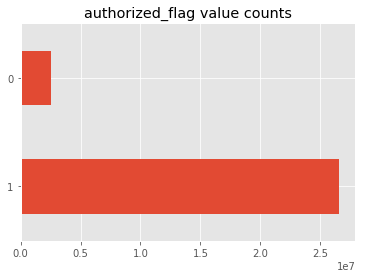

In [29]:
print(f"At average {historical_transactions['authorized_flag'].mean() * 100:.4f}% transactions are authorized")
historical_transactions['authorized_flag'].value_counts().plot(kind='barh', title='authorized_flag value counts');

In [30]:
# card_idのそれぞれの数
display(historical_transactions.card_id.nunique(), train.card_id.nunique(), test.card_id.nunique())

325540

201917

123623

card_id 毎にTest、Trainが決まっている　今回のものには全て登場してそう　重いので処理せず

In [32]:
autorized_card_rate = historical_transactions.groupby(['card_id'])['authorized_flag'].mean().sort_values()
autorized_card_rate.head()
# 承認されにくい人ランキング

card_id
C_ID_744d26ea32    0.030488
C_ID_bb8dd137c9    0.037037
C_ID_e56202cd39    0.042105
C_ID_4feacff118    0.050000
C_ID_c27b4f80f7    0.054545
Name: authorized_flag, dtype: float64

In [33]:
autorized_card_rate.tail() # 承認されやすい人ランキング

card_id
C_ID_d048b7cc60    1.0
C_ID_4e45fcdb43    1.0
C_ID_9f3ee1305e    1.0
C_ID_1b52a3e21b    1.0
C_ID_d3c3d988d5    1.0
Name: authorized_flag, dtype: float64

## installments 分割

In [34]:
historical_transactions['installments'].value_counts()

 0      15411747
 1      11677522
 2        666416
 3        538207
 4        179525
-1        178159
 6        132634
 10       118827
 5        116090
 12        55064
 8         20474
 7         10906
 9          5772
 11          830
 999         188
Name: installments, dtype: int64

ほとんどの人が分割せずに購入　-1、９９９という値が気になる あとは想定どおりな回数な気がする

In [35]:
historical_transactions.groupby(['installments'])['authorized_flag'].mean()

installments
-1      0.885692
 0      0.928032
 1      0.907024
 2      0.884020
 3      0.862254
 4      0.819903
 5      0.809183
 6      0.779732
 7      0.693196
 8      0.692439
 9      0.663721
 10     0.702021
 11     0.660241
 12     0.653694
 999    0.031915
Name: authorized_flag, dtype: float64

999は不正取引なため承認されないようない？　また分割が増えれば増えるほど承認されにくい

In [36]:
historical_transactions['installments'] = historical_transactions['installments'].astype('category')
historical_transactions['purchase_date'] = pd.to_datetime(historical_transactions['purchase_date'])

## purcahse_amount

正規化されたデータらしい

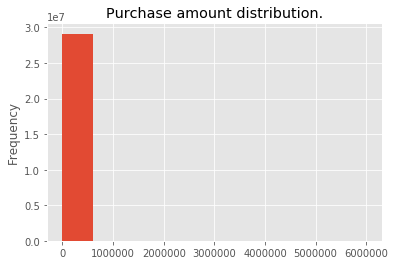

In [37]:
plt.title('Purchase amount distribution.');
historical_transactions['purchase_amount'].plot(kind='hist');

In [38]:
for i in [-1, 0]:
    n = historical_transactions.loc[historical_transactions['purchase_amount'] < i].shape[0]
    print(f"There are {n} transactions with purchase_amount less than {i}.")
for i in [0, 10, 100]:
    n = historical_transactions.loc[historical_transactions['purchase_amount'] > i].shape[0]
    print(f"There are {n} transactions with purchase_amount more than {i}.")

There are 0 transactions with purchase_amount less than -1.
There are 28036884 transactions with purchase_amount less than 0.
There are 1075467 transactions with purchase_amount more than 0.
There are 14924 transactions with purchase_amount more than 10.
There are 1183 transactions with purchase_amount more than 100.


In [42]:
print(f"mean of historical_transactions are {historical_transactions['purchase_amount'].mean()} ")
print(f"mean of historical_transactions are {historical_transactions['purchase_amount'].std()} ")

mean of historical_transactions are 0.03640090136488929 
mean of historical_transactions are 1123.5216483035226 


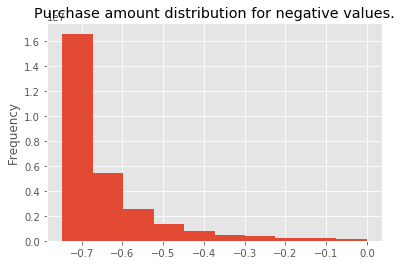

In [43]:
plt.title('Purchase amount distribution for negative values.');
historical_transactions.loc[historical_transactions['purchase_amount'] < 0, 'purchase_amount'].plot(kind='hist');

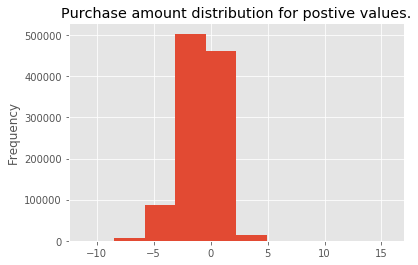

In [47]:
plt.title('Purchase amount distribution for postive values.')
np.log(historical_transactions.loc[historical_transactions['purchase_amount'] > 0, 'purchase_amount']).plot(kind='hist');

## Categories

In [53]:
map_dict = {'Y': 0, 'N': 1}
historical_transactions['category_1'] = historical_transactions['category_1'].apply(lambda x: map_dict[x])
# historical_transactions.groupby(['category_1']).agg({'purchase_amount': ['mean', 'std', 'count'], 'authorized_flag': ['mean', 'std']})

purchase_amount                        authorized_flag          
                      mean          std     count            mean       std
category_1                                                                 
0                -0.419327    22.087594   2084029        0.748578  0.433830
1                 0.071540  1166.016045  27028332        0.926265  0.261339

In [54]:
# historical_transactions.groupby(['category_2']).agg({'purchase_amount': ['mean', 'std', 'count'], 'authorized_flag': ['mean', 'std']})

purchase_amount                        authorized_flag          
                      mean          std     count            mean       std
category_2                                                                 
1.0               0.149570  1548.714128  15177199        0.927505  0.259306
2.0              -0.165690    89.285770   1026535        0.906225  0.291515
3.0               0.180375   210.616100   3911795        0.918857  0.273055
4.0              -0.158951   141.945606   2618053        0.927634  0.259094
5.0              -0.104457   162.428785   3725915        0.934260  0.247826

In [55]:
map_dict = {'A': 0, 'B': 1, 'C': 2, 'nan': 3}
historical_transactions['category_3'] = historical_transactions['category_3'].apply(lambda x: map_dict[str(x)])
# historical_transactions.groupby(['category_3']).agg({'purchase_amount': ['mean', 'std', 'count'], 'authorized_flag': ['mean', 'std']})

purchase_amount                        authorized_flag          
                      mean          std     count            mean       std
category_3                                                                 
0                 0.361926  1541.485188  15411747        0.928032  0.258436
1                -0.404556   104.062692  11677522        0.907024  0.290399
2                 0.106023    24.047655   1844933        0.836498  0.369824
3                 0.058447     2.191567    178159        0.885692  0.318186

In [58]:
# pd.to_pickle(historical_transactions, '../data/historical_transactions.pkl')
import pickle
import os.path

file_path = '../data/historical_transactions.pkl'
n_bytes = 2**31
max_bytes = 2**31 - 1
data = bytearray(n_bytes)

## write
bytes_out = pickle.dumps(data)
with open(file_path, 'wb') as f_out:
    for idx in range(0, len(bytes_out), max_bytes):
        f_out.write(bytes_out[idx:idx+max_bytes])

In [ ]:
for col in ['city_id', 'merchant_category_id', 'merchant_id', 'state_id', 'subsector_id']:
    print(f"There are {historical_transactions[col].nunique()} unique values in {col}.")

In [59]:
def aggregate_historical_transactions(trans, prefix):
    # more features from this kernel: https://www.kaggle.com/chauhuynh/my-first-kernel-3-699
    trans['purchase_month'] = trans['purchase_date'].dt.month
#     trans['year'] = trans['purchase_date'].dt.year
#     trans['weekofyear'] = trans['purchase_date'].dt.weekofyear
#     trans['month'] = trans['purchase_date'].dt.month
#     trans['dayofweek'] = trans['purchase_date'].dt.dayofweek
#     trans['weekend'] = (trans.purchase_date.dt.weekday >=5).astype(int)
#     trans['hour'] = trans['purchase_date'].dt.hour
    trans['month_diff'] = ((datetime.datetime.today() - trans['purchase_date']).dt.days)//30
    trans['month_diff'] += trans['month_lag']
    trans['installments'] = trans['installments'].astype(int)

    trans.loc[:, 'purchase_date'] = pd.DatetimeIndex(trans['purchase_date']). \
                                        astype(np.int64) * 1e-9
    trans = pd.get_dummies(trans, columns=['category_2', 'category_3'])
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'category_1': ['sum', 'mean'],
        'category_2_1.0': ['mean', 'sum'],
        'category_2_2.0': ['mean', 'sum'],
        'category_2_3.0': ['mean', 'sum'],
        'category_2_4.0': ['mean', 'sum'],
        'category_2_5.0': ['mean', 'sum'],
        'category_3_1': ['sum', 'mean'],
        'category_3_2': ['sum', 'mean'],
        'category_3_3': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'purchase_amount': ['sum', 'mean', 'max', 'min', 'std'],
        'installments': ['sum', 'mean', 'max', 'min', 'std'],
        'purchase_month': ['mean', 'max', 'min', 'std'],
        'purchase_date': [np.ptp, 'max', 'min'],
        'month_lag': ['min', 'max'],
        'merchant_category_id': ['nunique'],
        'state_id': ['nunique'],
        'subsector_id': ['nunique'],
        'city_id': ['nunique'],
        'month_diff': ['min', 'max', 'mean']
    }
    agg_trans = trans.groupby(['card_id']).agg(agg_func)
    agg_trans.columns = [prefix + '_'.join(col).strip() for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)

    df = (trans.groupby('card_id')
          .size()
          .reset_index(name='{}transactions_count'.format(prefix)))

    agg_trans = pd.merge(df, agg_trans, on='card_id', how='left')

    return agg_trans

In [96]:
def aggregate_per_month(history):
    grouped = history.groupby(['card_id', 'month_lag'])
    history['installments'] = history['installments'].astype(int)
    agg_func = {
            'purchase_amount': ['count', 'sum', 'mean', 'min', 'max', 'std'],
            'installments': ['count', 'sum', 'mean', 'min', 'max', 'std'],
            }

    intermediate_group = grouped.agg(agg_func)
    intermediate_group.columns = ['_'.join(col).strip() for col in intermediate_group.columns.values]
    intermediate_group.reset_index(inplace=True)

    final_group = intermediate_group.groupby('card_id').agg(['mean', 'std'])
    final_group.columns = ['_'.join(col).strip() for col in final_group.columns.values]
    final_group.reset_index(inplace=True)
    
    return final_group

final_group = aggregate_per_month(historical_transactions) 

In [74]:
import sys; sys.path.append('/Users/tomo/Work/mymodule')

In [75]:
import reduce_mem_usage

In [97]:
pd.to_pickle(final_group, '../data/final_group.pkl')
# del final_group

In [86]:
%%time
gc.collect()
# historical_transactions = reduce_mem_usage.get(historical_transactions)
history = aggregate_historical_transactions(historical_transactions, prefix='hist_')
# history = reduce_mem_usage.get(history)
del historical_transactions
gc.collect()

CPU times: user 6min 4s, sys: 46.3 s, total: 6min 50s
Wall time: 16h 31min 19s


In [87]:
pd.to_pickle(history, '../data/history.pkl')

In [89]:
history.head()

,card_id,hist_transactions_count,hist_authorized_flag_sum,hist_authorized_flag_mean,hist_category_1_sum,hist_category_1_mean,hist_category_2_1.0_mean,hist_category_2_1.0_sum,hist_category_2_2.0_mean,hist_category_2_2.0_sum,...,hist_purchase_date_min,hist_month_lag_min,hist_month_lag_max,hist_merchant_category_id_nunique,hist_state_id_nunique,hist_subsector_id_nunique,hist_city_id_nunique,hist_month_diff_min,hist_month_diff_max,hist_month_diff_mean
0,C_ID_00007093c1,149,114.0,0.765101,121.0,0.812081,0.000000,0.0,0.000000,0.0,...,1.487081e+09,-12,0,18,3,13,4,10,11,10.214765
1,C_ID_0001238066,123,120.0,0.975610,121.0,0.983740,0.772358,95.0,0.000000,0.0,...,1.506638e+09,-5,0,29,6,17,18,10,11,10.065041
2,C_ID_0001506ef0,66,62.0,0.939394,66.0,1.000000,0.030303,2.0,0.000000,0.0,...,1.484411e+09,-13,0,19,2,12,3,10,11,10.166667
3,C_ID_0001793786,216,189.0,0.875000,214.0,0.990741,0.050926,11.0,0.351852,76.0,...,1.484994e+09,-9,0,48,4,24,10,14,15,14.148148
4,C_ID_000183fdda,144,137.0,0.951389,140.0,0.972222,0.048611,7.0,0.006944,1.0,...,1.502099e+09,-6,0,36,7,21,9,10,11,10.090278


In [91]:
train = pd.read_pickle('../data/train.pkl')
test = pd.read_pickle('../data/test.pkl')

In [92]:
train = pd.merge(train, history, on='card_id', how='left')
test = pd.merge(test, history, on='card_id', how='left')
del history

In [98]:
final_group = pd.read_pickle('../data/final_group.pkl')

In [99]:
train = pd.merge(train, final_group, on='card_id')
test = pd.merge(test, final_group, on='card_id')
gc.collect()
del final_group

In [100]:
pd.to_pickle(train, '../data/train_FG_Hist.pkl')
pd.to_pickle(test, '../data/test_FG_Hist.pkl')

In [102]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,first_active_month_year,first_active_month_weekday,first_active_month_month,elapsed_time,...,installments_sum_mean,installments_sum_std,installments_mean_mean,installments_mean_std,installments_min_mean,installments_min_std,installments_max_mean,installments_max_std,installments_std_mean,installments_std_std
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,2017,3,6,245,...,0.444444,0.726483,0.018182,0.032221,0.000000,0.000000,0.333333,0.500000,0.074290,0.117067
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,2017,6,1,396,...,41.769231,14.341977,1.713279,0.546685,0.692308,0.751068,6.307692,2.780426,1.478938,0.895708
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,2016,0,8,549,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,2017,4,9,153,...,14.000000,11.523888,1.044819,0.215637,0.333333,1.032796,2.000000,1.095445,0.518905,0.483284
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,2017,2,11,92,...,45.500000,23.979158,1.369969,0.597277,1.000000,0.000000,4.500000,5.066228,1.083005,1.664428


# merchants

In [3]:
merchants = pd.read_csv('../data/merchants.csv')
e = pd.read_excel('../data/Data_Dictionary.xlsx', sheetname='merchant')
display(e, merchants.head())

,merchants.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,merchant_id,Unique merchant identifier
3,merchant_group_id,Merchant group (anonymized )
4,merchant_category_id,Unique identifier for merchant category (anony...
5,subsector_id,Merchant category group (anonymized )
6,numerical_1,anonymized measure
7,numerical_2,anonymized measure
8,category_1,anonymized category
9,most_recent_sales_range,Range of revenue (monetary units) in last acti...


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [4]:
# encoding categories.
map_dict = {'Y': 0, 'N': 1}
merchants['category_1'] = merchants['category_1'].apply(lambda x: map_dict[x])
merchants.loc[merchants['category_2'].isnull(), 'category_2'] = 0
merchants['category_4'] = merchants['category_4'].apply(lambda x: map_dict[x])

In [5]:
merchants['merchant_category_id'].nunique(), merchants['merchant_group_id'].nunique()

(324, 109391)

## nurmerical

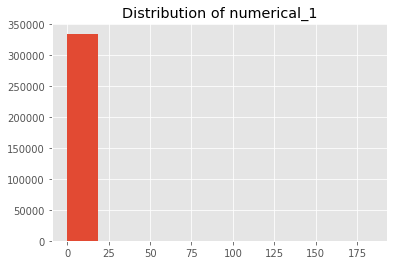

In [6]:
plt.hist(merchants['numerical_1']);
plt.title('Distribution of numerical_1');

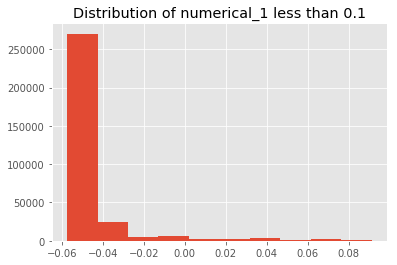

In [7]:
plt.hist(merchants.loc[merchants['numerical_1'] < 0.1, 'numerical_1']);
plt.title('Distribution of numerical_1 less than 0.1');

In [8]:
min_n1 = merchants['numerical_1'].min()
_ = sum(merchants['numerical_1'] == min_n1) / merchants['numerical_1'].shape[0]
print(f'{_ * 100:.4f}% of values in numerical_1 are equal to {min_n1}')

68.3570% of values in numerical_1 are equal to -0.05747065


74.3104% of values in numerical_2 are equal to -0.05747065


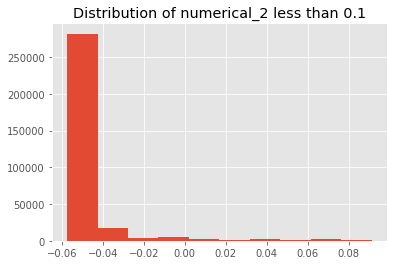

In [9]:
plt.hist(merchants.loc[merchants['numerical_2'] < 0.1, 'numerical_2']);
plt.title('Distribution of numerical_2 less than 0.1');
min_n2 = merchants['numerical_2'].min()
_ = sum(merchants['numerical_2'] == min_n2) / merchants['numerical_2'].shape[0]
print(f'{_ * 100:.4f}% of values in numerical_2 are equal to {min_n2}')

In [10]:
(merchants['numerical_1'] != merchants['numerical_2']).sum() / merchants.shape[0]
# 10%1の値以外は同じ値をとる 

0.10056289886942181

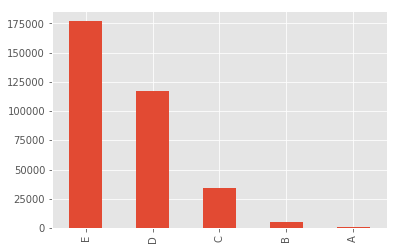

In [11]:
merchants.most_recent_sales_range.value_counts().plot('bar')

In [12]:
d = merchants['most_recent_sales_range'].value_counts().sort_index()
e = merchants.loc[merchants['numerical_2'] < 0.1].groupby('most_recent_sales_range')['numerical_1'].mean()
data = [go.Bar(x=d.index, y=d.values, name='counts'), go.Scatter(x=e.index, y=e.values, name='mean numerical_1', yaxis='y2')]
layout = go.Layout(dict(title = "Counts of values in categories of most_recent_sales_range",
                        xaxis = dict(title = 'most_recent_sales_range'),
                        yaxis = dict(title = 'Counts'),
                        yaxis2=dict(title='mean numerical_1', overlaying='y', side='right')),
                   legend=dict(orientation="v"))
py.iplot(dict(data=data, layout=layout))

In [13]:
d = merchants['most_recent_purchases_range'].value_counts().sort_index()
e = merchants.loc[merchants['numerical_2'] < 0.1].groupby('most_recent_purchases_range')['numerical_1'].mean()
data = [go.Bar(x=d.index, y=d.values, name='counts'), go.Scatter(x=e.index, y=e.values, name='mean numerical_1', yaxis='y2')]
layout = go.Layout(dict(title = "Counts of values in categories of most_recent_purchases_range",
                        xaxis = dict(title = 'most_recent_purchases_range'),
                        yaxis = dict(title = 'Counts'),
                        yaxis2=dict(title='mean numerical_1', overlaying='y', side='right')),
                   legend=dict(orientation="v"))
py.iplot(dict(data=data, layout=layout))

In [14]:
(merchants.most_recent_purchases_range != merchants.most_recent_sales_range).sum() / merchants.shape[0]

0.29326314028252504

salesとpurchasesで違う値をとるのは３割だけ

### avg_sales_lag

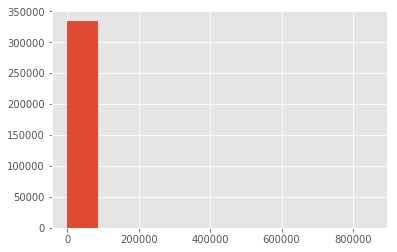

In [15]:
merchants['avg_sales_lag3'].fillna(0).hist()

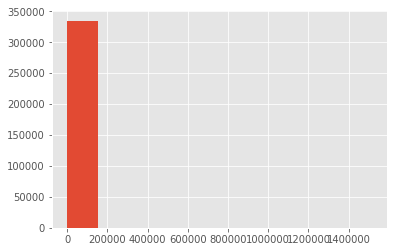

In [16]:
merchants.avg_sales_lag6.fillna(0).hist()

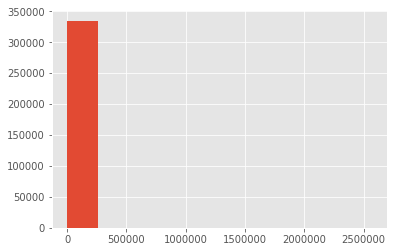

In [17]:
merchants.avg_sales_lag12.fillna(0).hist()

In [18]:
for col in ['avg_sales_lag3', 'avg_sales_lag6', 'avg_sales_lag12']:
    print(col)
    print(f'Max value of {col} is {merchants[col].max()}')
    print(f'Min value of {col} is {merchants[col].min()}')
    print(f'Mean value of {col} is {merchants[col].mean()}')
    print(f'Median value of {col} is {merchants[col].median()}')

avg_sales_lag3
Max value of avg_sales_lag3 is 851844.64
Min value of avg_sales_lag3 is -82.13
Mean value of avg_sales_lag3 is 13.832992503355294
Median value of avg_sales_lag3 is 1.0
avg_sales_lag6
Max value of avg_sales_lag6 is 1513959.0
Min value of avg_sales_lag6 is -82.13
Mean value of avg_sales_lag6 is 21.650787132899893
Median value of avg_sales_lag6 is 1.01
avg_sales_lag12
Max value of avg_sales_lag12 is 2567408.0
Min value of avg_sales_lag12 is -82.13
Mean value of avg_sales_lag12 is 25.227708876757944
Median value of avg_sales_lag12 is 1.02


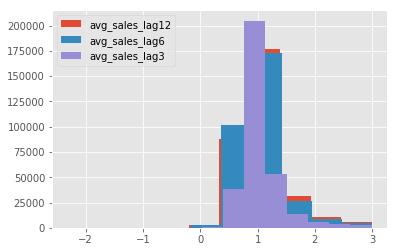

In [19]:
plt.hist(merchants.loc[(merchants['avg_sales_lag12'] < 3) & (merchants['avg_sales_lag12'] > -10), 'avg_sales_lag12'].fillna(0), label='avg_sales_lag12');
plt.hist(merchants.loc[(merchants['avg_sales_lag6'] < 3) & (merchants['avg_sales_lag6'] > -10), 'avg_sales_lag6'].fillna(0), label='avg_sales_lag6');
plt.hist(merchants.loc[(merchants['avg_sales_lag3'] < 3) & (merchants['avg_sales_lag3'] > -10), 'avg_sales_lag3'].fillna(0), label='avg_sales_lag3');
plt.legend();

In [141]:
merchants.merchant_id.value_counts().head()

M_ID_d123532c72    4
M_ID_ef233cff26    4
M_ID_30340088f2    4
M_ID_ebbdb42da6    4
M_ID_992a180b15    4
Name: merchant_id, dtype: int64

In [142]:
merchants.merchant_group_id.value_counts().head()

35      46026
434       482
419       365
713       333
3648      305
Name: merchant_group_id, dtype: int64

In [143]:
merchants.merchant_category_id.value_counts().head()

705    30666
278    17992
307    17528
367    15387
68     14341
Name: merchant_category_id, dtype: int64

In [20]:
merchantsGB = merchants.groupby('merchant_id')

In [24]:
merchants.merchant_group_id.nunique()

109391

In [25]:
merchants.merchant_category_id.nunique()

324

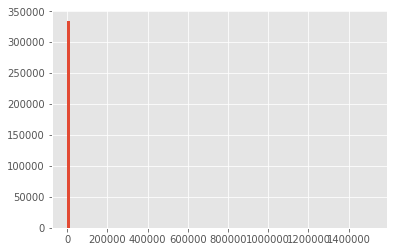

In [34]:
merchantsGB.avg_sales_lag6.mean().hist(bins = 100)

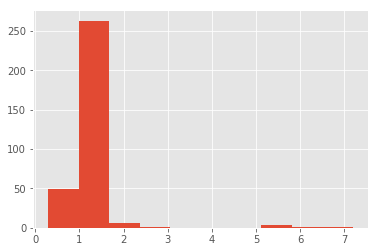

In [40]:
 merchants.groupby('merchant_category_id').avg_sales_lag6.median().hist()

In [39]:
merchants.groupby('merchant_category_id').avg_sales_lag6.mean()

merchant_category_id
-1       1.000000
 2      62.386287
 9       2.977070
 11      0.865000
 14      1.741971
 16      1.987544
 18      6.320000
 19      3.354404
 21      2.097663
 31      1.151250
 33      1.581098
 34      1.630653
 36      1.204556
 38      1.903303
 40      1.429063
 45      1.779257
 49      3.856667
 52      2.768596
 53      1.605333
 56      1.386667
 57      1.807563
 59      1.560000
 60      4.287726
 63      2.928363
 67      0.830000
 68      2.830227
 69      2.519915
 71      2.178342
 78      2.383883
 80      2.971746
          ...    
 795     1.848252
 796    73.442542
 803     1.763333
 805     5.780000
 806     3.009158
 808    10.083333
 813     2.076955
 814     2.041667
 818     2.014421
 819     6.629868
 823     2.273884
 827     1.462438
 829     1.285490
 834     1.404202
 836     2.088730
 839     2.196494
 840     3.515518
 842     3.934726
 843     1.578115
 847    18.393333
 854     3.566486
 873     2.135882
 875     0.770000
 878   